ลองเล่นดู
https://ai.iapp.co.th/qa


In [ ]:
!nvidia-smi

Fri Dec 24 14:13:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |  11421MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip -q install transformers

In [ ]:
!pip -q install datasets

Thai BERT


*   bert-based-multilingual-uncased จาก google
*   BERT-th จาก ThAIKeras
*   Geotrend/bert-base-th-cased





In [ ]:
from transformers import AutoTokenizer,AutoModel
from google.colab import widgets

In [ ]:
pretrained="monsoon-nlp/bert-base-thai" #@param ["monsoon-nlp/bert-base-thai","bert-base"]

In [ ]:
name=pretrained

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(name,use_fast=True)
model=AutoModel.from_pretrained(name)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Preprocessing

In [ ]:
text=["ทดสอบ ใช้ งาน กับ BERT ภาษาไทย"]

In [ ]:
sent_id=tokenizer.batch_encode_plus(text,padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[1, 6281, 169, 301, 104, 4, 2866, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
text=["ทดสอบใช้งานกับ BERT ภาษาไทย"]

In [ ]:
sent_id=tokenizer.batch_encode_plus(text,padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[1, 4, 4, 2866, 2]], 'token_type_ids': [[0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1]]}


Fill Mask

In [ ]:
from transformers import pipeline

In [ ]:
unmasker=pipeline('fill-mask',model=name,tokenizer=tokenizer)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
unmasker("นายกรัฐมนตรี[MASK]เงิน")

[{'score': 0.0003061425231862813,
  'sequence': 'นายกรัฐมนตรี สเตเดียม เงิน',
  'token': 13770,
  'token_str': 'สเตเดียม'},
 {'score': 0.00028130007558502257,
  'sequence': 'นายกรัฐมนตรี ประหยัด เงิน',
  'token': 14488,
  'token_str': 'ประหยัด'},
 {'score': 0.00028058065799996257,
  'sequence': 'นายกรัฐมนตรี ): เงิน',
  'token': 18062,
  'token_str': '):'},
 {'score': 0.0002498539397493005,
  'sequence': 'นายกรัฐมนตรี ▁หมายเลข เงิน',
  'token': 13141,
  'token_str': '▁หมายเลข'},
 {'score': 0.00024777543148957193,
  'sequence': 'นายกรัฐมนตรี ตาน เงิน',
  'token': 6687,
  'token_str': 'ตาน'}]

In [ ]:
unmasker("เด็ก[MASK]เกม")

[{'score': 0.0003352552012074739,
  'sequence': 'เด็ก ประหยัด เกม',
  'token': 14488,
  'token_str': 'ประหยัด'},
 {'score': 0.00029489025473594666,
  'sequence': 'เด็ก uph เกม',
  'token': 22512,
  'token_str': 'uph'},
 {'score': 0.0002843058609869331,
  'sequence': 'เด็ก ตาน เกม',
  'token': 6687,
  'token_str': 'ตาน'},
 {'score': 0.0002765992539934814,
  'sequence': 'เด็ก เอเธนส์ เกม',
  'token': 4484,
  'token_str': 'เอเธนส์'},
 {'score': 0.00027567369397729635,
  'sequence': 'เด็ก ตามความ เกม',
  'token': 20691,
  'token_str': 'ตามความ'}]

Text Classification (Wongnai Dataset)

In [ ]:
!pip -q install simpletransformers

In [ ]:
!pip -q install pythainlp

In [ ]:
from datasets import load_dataset
wongnai_ds=load_dataset('wongnai_reviews')

Using custom data configuration default
Reusing dataset wongnai_reviews (/root/.cache/huggingface/datasets/wongnai_reviews/default/1.0.1/0741f812b51dea635d957a5cc8f46fcc98828c0f6c557336ab20367778299a4d)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
wongnai_ds

DatasetDict({
    train: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 6203
    })
})

In [ ]:
import numpy as np
import pandas as pd
num_labels=len(np.unique(np.array(wongnai_ds["train"]["star_rating"])))

In [ ]:
num_labels

5

In [ ]:
wongnai=pd.DataFrame(wongnai_ds["train"])

In [ ]:
wongnai_train=wongnai.sample(frac=0.2)
wongnai_eval=wongnai.sample(frac=0.05)

In [ ]:
from pythainlp.tokenize import word_tokenize
wongnai_train["text"]=wongnai_train["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_train["labels"]=wongnai_train["star_rating"]
wongnai_train.labels=pd.Categorical(wongnai_train.labels)

In [ ]:
wongnai_train

,review_body,star_rating,text,labels
33993,รสชาติโจ๊กสามารถกินได้แบบไม่ต้องปรุงหมูเด้งทั้...,4,รสชาติ โจ๊ก สามารถ กิน ได้ แบบ ไม่ต้อง ปรุง หม...,4
7051,ร้านนี้เมื่อตอนมอปลายแวะทุกเย็น ปลื้มมากพี่เจ้...,4,ร้าน นี้ เมื่อ ตอน มอ ปลาย แวะ ทุก เย็น ปลื้...,4
9413,วันนี้กลางวันก่อนไปธุระทานกลางวันที่yoshinoyaท...,2,วันนี้ กลาง วันก่อน ไป ธุระ ทาน กลาง วันที่ yo...,2
23749,ร้านกาแฟเล็กๆ บนถนนกิ่งแก้ว \nภายใน...,3,ร้านกาแฟ เล็ก ๆ บน ถนน กิ่ง แก้ว ...,3
37393,ข้าวมันไก่ร้านก๊ะสาว มีไก่ยาง ข้าวหมกไก่ ข้าวเ...,2,ข้าวมันไก่ ร้าน ก๊ะ สาว มี ไก่ ยาง ข้าวหมก...,2
...,...,...,...,...
4611,"""กินก๋วยเตี๋ยวสักชามแล้วกัน รอสักวันได้เพียงแค...",2,""" กิน ก๋วยเตี๋ยว สัก ชาม แล้วกัน รอ สักวัน ไ...",2
14173,วันนี้พาแม่ม่หาหมอที่โรงพยาบาลสวนดอก อยู่ตั้งแ...,2,วันนี้ พา แม่ ม่ หา หมอ ที่ โรงพยาบาล สวน ดอก ...,2
8855,มีโอกาสขับผ่านศรีราชา คิดว่าจะกินอะไรดี\nเปิดว...,3,มีโอกาส ขับ ผ่าน ศรีราชา คิด ว่า จะ กิน อะไร...,3
39044,Texas chicken วันเสาร์ลูกค้าแน่นร้านเหมือนเดิม...,2,Texas chicken วัน เสาร์ ลูกค้า แน่น ร้าน เ...,2


In [ ]:
wongnai_eval["text"]=wongnai_eval["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_eval["labels"]=wongnai_eval["star_rating"]
wongnai_eval.labels=pd.Categorical(wongnai_eval.labels)

In [ ]:
wongnai_eval

,review_body,star_rating,text,labels
4373,ร้านนี้ตั้งอยู่ในโครงกานมีโชคพลาซ่า ร้านอยุ่บน...,2,ร้าน นี้ ตั้งอยู่ ใน โครง กาน มีโชค พลาซ่า ร...,2
20651,ปกติเข้าร้าน true coffee ทุกครั้งจะสั่งเมนูเคร...,2,ปกติ เข้า ร้าน true coffee ทุกครั้ง จะ ส...,2
11494,ที่ห้าง porto chino ถนนพระรามสอง ตกแต่ง outdoo...,2,ที่ ห้าง porto chino ถนน พระราม สอง ตก...,2
34552,ร้านท่าทอง\nตั้งอยู่บนถนนเส้นราชพฤกษ์ อยู่ใกล้...,3,ร้าน ท่า ทอง \n ตั้งอยู่ บน ถนน เส้น ราชพฤกษ์ ...,3
29250,เป็นร้านที่อลังการงานสร้างมากๆๆ ร้านใหญ่มากๆๆ ...,3,เป็น ร้าน ที่ อลังการ งาน สร้าง มาก ๆๆ ร้าน ...,3
...,...,...,...,...
11417,ร้านนี้ไม่ได้ทานมานานมากแล้วค่ะ แต่ก่อนทานค่อน...,3,ร้าน นี้ ไม่ ได้ ทาน มา นาน มาก แล้ว ค่ะ แต่...,3
5198,ร้าน เจ๊อิ๋วซีฟู๊ด เป็นอีกหนึ่งร้านอาหารทะเลที...,3,ร้าน เจ๊ อิ๋ว ซี ฟู๊ด เป็น อีก หนึ่ง ร้าน ...,3
204,ร้านอาหารอิตตาเลียนร้านนี้อยู่ชั้นล็อบบี้ โรงแ...,4,ร้านอาหาร อิต ตา เลียน ร้าน นี้ อยู่ ชั้น ล็อบ...,4
30691,ตอนแรกกะว่าจะมาลอง Jangara Black แต่ว่าเห็นเคร...,3,ตอนแรก กะ ว่า จะ มา ลอง Jangara Black แต...,3


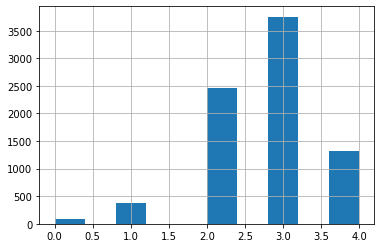

In [ ]:
wongnai_train["labels"].hist()

In [ ]:
wongnai_train=pd.concat([
  wongnai_train[wongnai_train["labels"]==0].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==1].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==2].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==3].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==4].sample(n=500,replace=True)],axis=0)

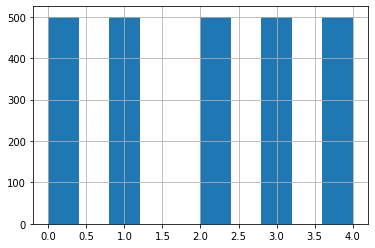

In [ ]:
wongnai_train["labels"].hist()

In [ ]:
#model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

model_args={
    "reprocess_input_data":True,
    "train_batch_size":32,
    "use_early_stopping":True,
    "early_stopping_delta":0.01,
    "early_stopping_metric":"mcc",
    "early_stopping_metric_minimize":False,
    "early_stopping_patience":5,
    "evaluate_during_training_steps":500,
    "fp16":True,
    "overwrite_output_dir":True,
    "use_cached_eval_features":False,
    'max_seq_length':256,
    'no_cache':True,
    "num_train_epochs":3,
    'custom_parameter_groups':[{
        "params":["classfier.weight","bert.encoder.layer.10.output.dense.weight"],
        "lr":1e-2
    }]
}

model=ClassificationModel(
    "bert",
    name,
    use_cuda=torch.cuda.is_available(),
    args=model_args,
    num_labels=num_labels)

model.train_model(wongnai_train,show_running_loss=True, eval_df=wongnai_eval,acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

RuntimeError: ignored

In [ ]:
result,model_outputs,wrong_predictions=model.eval_model(wongnai_eval)

  0%|          | 0/2000 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
result

In [ ]:
model_outputs

In [ ]:
len(wrong_predictions)

In [ ]:
model.predict(["ห่วย แดก กิน ไม่ ได้ เลย ขอ บอก อาหาร เน่า มาก กลิ่น เหม็น มี แมลง สาบ มารยาท ทราม สุด ๆ"])

In [ ]:
model.predict(["ร้าน นี้ อาหาร เยี่ยม มาก สุดยอด ประทับ ใจ ที่จอดรถ ใหญ่ ตั้งใจ ทำงาน มาก เลย"])

Text Classification with Custom Dataset (True Voice Intent)

In [ ]:
!git clone https://github.com/kobkrit/truevoice-intent

Cloning into 'truevoice-intent'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


In [ ]:
%cd /content

/content


In [ ]:
!unzip truevoice-intent/mari-intent.zip

Archive:  truevoice-intent/mari-intent.zip
  inflating: mari_test.csv           
  inflating: mari_train.csv          


In [ ]:
!ls

mari_test.csv  mari_train.csv  outputs	runs  sample_data  truevoice-intent


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_valid_tv_df=pd.read_csv(f'mari_train.csv')
test_tv_df=pd.read_csv(f'mari_test.csv')

In [ ]:
train_valid_tv_df.describe()

,texts,texts_deepcut,action,object,destination
count,12939,12939,12939,12939,12939
unique,11398,11363,8,26,7
top,สอบถามยอดค้างชำระค่ะ,สอบถาม ยอดค้าง ชำระ ค่ะ,enquire,service,billing and payment
freq,10,10,8133,2090,5007


In [ ]:
test_tv_df.describe()

,texts,texts_deepcut,action,object,destination
count,3236,3236,3236,3236,3236
unique,2003,2003,8,24,7
top,บริการอื่นๆ,บริการ อื่น ๆ,enquire,internet,billing and payment
freq,97,97,2351,524,977


In [ ]:
from sklearn import preprocessing
tv_le=preprocessing.LabelEncoder()
tv_le.fit(list(test_tv_df['destination']))

LabelEncoder()

In [ ]:
train_tv_df,val_tv_df = train_test_split(train_valid_tv_df, test_size=0.15, random_state=23)
train_tv_df.head()

,texts,texts_deepcut,action,object,destination
8106,ผมจะยกเลิกข้อความอ่ะครับ,ผม จะ ยกเลิก ข้อความ อ่ะครับ,cancel,service,other queries
9586,พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,enquire,internet,internet
8606,พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,enquire,internet,internet
5083,จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,enquire,bill,billing and payment
11454,สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,enquire,nontruemove,other queries


In [ ]:
train_tv_df["text"]=train_tv_df["texts_deepcut"]
train_tv_df["labels"]=tv_le.transform(train_tv_df["destination"])
val_tv_df["text"]=val_tv_df["texts_deepcut"]
val_tv_df["labels"]=tv_le.transform(val_tv_df["destination"])
test_tv_df["text"]=test_tv_df["texts_deepcut"]
test_tv_df["labels"]=tv_le.transform(test_tv_df["destination"])


In [ ]:
train_tv_df

,texts,texts_deepcut,action,object,destination,text,labels
8106,ผมจะยกเลิกข้อความอ่ะครับ,ผม จะ ยกเลิก ข้อความ อ่ะครับ,cancel,service,other queries,ผม จะ ยกเลิก ข้อความ อ่ะครับ,4
9586,พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,enquire,internet,internet,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,2
8606,พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,enquire,internet,internet,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,2
5083,จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,enquire,bill,billing and payment,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,0
11454,สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,enquire,nontruemove,other queries,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,4
...,...,...,...,...,...,...,...
9704,พี่จะยกเลิกเสียงเพลงรอสายค่ะ,พี่ จะ ยกเลิก เสียง เพลง รอสายค่ะ,cancel,service,other queries,พี่ จะ ยกเลิก เสียง เพลง รอสายค่ะ,4
11190,สอบถาม internet ที่สมัครใช้งานอย่างไรค่ะ,สอบถาม internet ที่ สมัคร ใช้ งาน อย่าง ไร ค่ะ,enquire,package,promotions,สอบถาม internet ที่ สมัคร ใช้ งาน อย่าง ไร ค่ะ,5
10185,รบกวนเช็คค่าบริการอินเตอร์เน็ต,รบกวนเช็ค ค่า บริการ อินเตอร์เน็ต,enquire,balance,billing and payment,รบกวนเช็ค ค่า บริการ อินเตอร์เน็ต,0
9256,พอดีว่าจะเปลี่ยนโปรค่ะเป๊น นาที ค่ะ,พอดี ว่า จะ เปลี่ยน โปร ค่ะ เป๊น นาที ค่ะ,change,package,promotions,พอดี ว่า จะ เปลี่ยน โปร ค่ะ เป๊น นาที ค่ะ,5


In [ ]:
num_labels=len(np.unique(np.array(train_tv_df["labels"])))

In [ ]:
num_labels

7

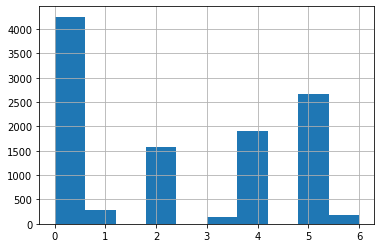

In [ ]:
train_tv_df["labels"].hist()

In [ ]:
#model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

model_args={
    "reprocess_input_data":True,
    "train_batch_size":32,
    "use_early_stopping":True,
    "early_stopping_delta":0.01,
    "early_stopping_metric":"mcc",
    "early_stopping_metric_minimize":False,
    "early_stopping_patience":5,
    "evaluate_during_training_steps":500,
    "fp16":False,
    "num_train_epochs":3,
    "overwrite_output_dir": True}

model=ClassificationModel(
    "bert",
    name,
    use_cuda=torch.cuda.is_available(),
    args=model_args,
    num_labels=num_labels)

model.train_model(train_tv_df,show_running_loss=True, eval_df=val_tv_df,acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

RuntimeError: ignored

Thai Question Answering (Thai QA)

In [ ]:
from datasets import load_dataset
thaiqa_ds=load_dataset('thaiqa_squad')

Reusing dataset thaiqa_squad (/root/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/fce14864b511d48464540780f328f4b415746b63f2fd934ad0b06c3eead7787b)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
thaiqa_ds

DatasetDict({
    train: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 74
    })
})

In [ ]:
import pandas as pd
qa_train=pd.DataFrame(thaiqa_ds["train"])

In [ ]:
qa_train

,question_id,article_id,context,question,answers
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi..."
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit..."
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':..."
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio..."
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position..."
...,...,...,...,...,...
3995,3996,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,"{'answer': ['นครราชสีมา'], 'answer_begin_posit..."
3996,3997,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,"{'answer': ['ดอกสาธร'], 'answer_begin_position..."
3997,3998,20722,"<doc id=""20722"" url=""https://th.wikipedia.org/...",เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,"{'answer': ['ราบัต'], 'answer_begin_position':..."
3998,3999,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,"{'answer': ['2532'], 'answer_begin_position': ..."


In [ ]:
from lxml import etree
import xml.etree.ElementTree as ET
parser=etree.XMLParser(recover=True)
tree=ET.fromstring(qa_train["context"][0],parser=parser)
print(tree.tag)
print(tree.attrib)
print(tree.text)

doc
{'id': '115035', 'url': 'https://th.wikipedia.org/wiki?curid=115035', 'title': 'เบนจี้'}
เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji

In [ ]:
def extract_text(body):
  tree=ET.fromstring(body,parser=parser)
  return tree.text

In [ ]:
extract_text(qa_train["context"][0])

"เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax  the Alien Prince (ภาพยนตร์ซีรีส์) - พ.ศ. 2530, Benji the Hunted (ภาพยนตร์) - พ.ศ. 254

In [ ]:
qa_train["context_text"]=qa_train["context"].apply(extract_text)

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...


In [ ]:
from pythainlp.tokenize import word_tokenize
qa_train["context_text_wordsegged"]=qa_train["context_text"].apply(lambda x: " ".join(word_tokenize(x)))

In [ ]:
qa_train["question_wordsegged"]=qa_train["question"].apply(lambda x: " ".join(word_tokenize(x)))

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text,context_text_wordsegged,question_wordsegged
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,เพลง Benji ' s Theme ใช้ ประกอบ ภาพยนตร์...
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ กระ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...


In [ ]:
qa_train["answers_wordsegged"]=qa_train["answers"].apply(lambda x: " ".join(word_tokenize(x["answer"][0])))

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text,context_text_wordsegged,question_wordsegged,answers_wordsegged
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...,ฮิ กกิ้นส์
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,เพลง Benji ' s Theme ใช้ ประกอบ ภาพยนตร์...,ชาร์ลี ริ ช
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,เม ช ตา
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,ลม สุริยะ
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ กระ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...,ปี 1933


In [ ]:
answer_starts=[]
for idx, row in qa_train.iterrows():
  try:
    answer_start=row["context_text_wordsegged"].index(row["answers_wordsegged"])
  except:
    answer_start=-1
  answer_starts.append(answer_start)


In [ ]:
qa_train["answer_starts"]=answer_starts

In [ ]:
qa_train.tail()

,question_id,article_id,context,question,answers,context_text,context_text_wordsegged,question_wordsegged,answers_wordsegged,answer_starts
3995,3996,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,"{'answer': ['นครราชสีมา'], 'answer_begin_posit...",จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัด นครราชสีมา นครราชสีมา หรือ รู้จัก ...,จังหวัด ใด มี พื้นที่ มาก ที่สุด ในประเทศ ไทย,นครราชสีมา,8
3996,3997,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,"{'answer': ['ดอกสาธร'], 'answer_begin_position...",จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัด นครราชสีมา นครราชสีมา หรือ รู้จัก ...,ดอกไม้ ประจำจังหวัด นครราชสีมา ในประเทศ ไทย คื...,ดอก สาธร,926
3997,3998,20722,"<doc id=""20722"" url=""https://th.wikipedia.org/...",เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,"{'answer': ['ราบัต'], 'answer_begin_position':...",ประเทศโมร็อกโก โมร็อกโก (; ชื่อทางการคือ ราชอา...,ประเทศ โมร็อกโก โมร็อกโก (; ชื่อ ทางการ ...,เมืองหลวง ของ ประเทศ โมร็อกโก มี ชื่อว่า อะไร,รา บัต,470
3998,3999,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,"{'answer': ['2532'], 'answer_begin_position': ...",คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,คิง เพาเวอร์ กลุ่ม บริษัท คิง เพาเวอร์...,กลุ่ม บริษัท คิง เพาเวอร์ เป็น บริษัท ด้...,2532,169
3999,4000,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",ใครคือผู้ก่อตั้งบริษัทด้านธุรกิจค้าปลีกสินค้าป...,"{'answer': ['วิชัย ศรีวัฒนประภา'], 'answer_beg...",คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,คิง เพาเวอร์ กลุ่ม บริษัท คิง เพาเวอร์...,ใคร คือ ผู้ก่อตั้ง บริษัท ด้าน ธุรกิจ ค้าปลีก ...,วิชัย ศรี วัฒน ประภา,180


Standford Question Answering Dataset (SQuad) format

In [ ]:
train_data=[]
for idx, row in qa_train.iterrows():
  doc={}
  doc["context"]=row["context_text_wordsegged"]
  doc["gas"]=[{"id":idx, "is_impossible":row["answer_starts"]<0,"question":row["question_wordsegged"],"answers":[{"text":row["answers_wordsegged"],"answer_start":row["answer_starts"]}]}]
  train_data.append(doc)

In [ ]:
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

model_args=QuestionAnsweringArgs()
model_args.train_batch_size=32
model_args.evaluate_during_training=True
model_args.num_train_epochs=30
model_args.overwrite_output_dir=True
model=QuestionAnsweringModel(
    "bert",name
)

model.train_model(train_data,eval_data=train_data)

result,texts=model.eval_model(train_data)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForQuestionAnswering: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from th

ValueError: ignored